In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.**

In [3]:
happiness = pd.read_csv('/content/drive/MyDrive/Happiness_report.csv')

In [4]:
happiness.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


**3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.**

In [5]:
mexico = happiness[happiness['Country or region'] == 'Mexico']

In [6]:
mexico

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [7]:
mexico.set_index('Country or region', inplace = True)

In [8]:
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


**4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.**

Text(6.595, 0, 'MEX')

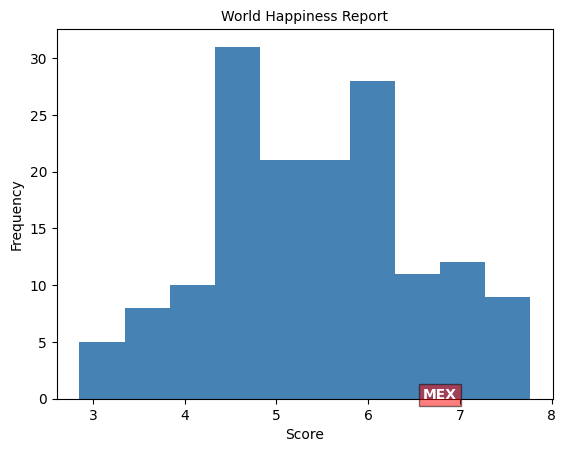

In [9]:
plt.hist('Score', data = happiness, color = 'steelblue')
plt.title('World Happiness Report', size = 10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.text(mexico.iloc[0, 1], 0, 'MEX', weight = 'bold', color = 'white', bbox = dict(facecolor = 'red', alpha = 0.5, pad = 3))

**5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.**

In [10]:
# Verifico que la columna 'Healthy life expectancy' no tenga valores NAN
happiness['Healthy life expectancy'].isnull().any()

False

Text(1.1, 0.861, 'MEX')

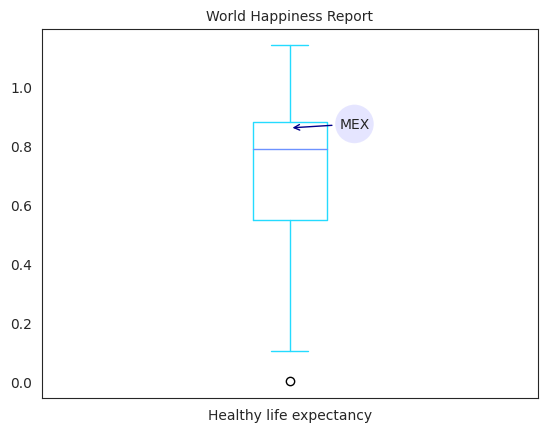

In [11]:
sns.set_style('white')
sns.set_palette('cool')
happiness['Healthy life expectancy'].plot.box()
plt.title('World Happiness Report', size = 10)
plt.annotate('MEX',xy = (1, mexico.iloc[0, 4]), xytext = (1.1,mexico.iloc[0, 4]), arrowprops = dict(arrowstyle = '->', color = 'darkblue'), bbox = dict(facecolor = 'blue', alpha = 0.1, pad = 0.3, boxstyle = 'circle'))

**6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.**

In [12]:
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [13]:
mexico = mexico.T

In [14]:
mexico

Country or region,Mexico
Overall rank,23.000
Score,6.595
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


In [15]:
mexico.drop(['Overall rank', 'Score'], axis = 0, inplace = True)
mexico.columns.name = ''
mexico.columns = ['Factors']

In [16]:
mexico

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


In [17]:
mexico

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


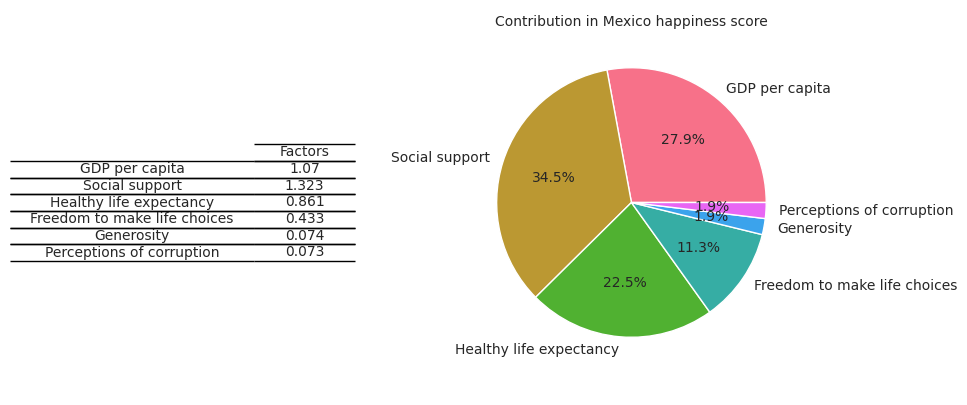

In [18]:
sns.set_palette('husl')

fig = plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)

ax1 = fig.add_subplot(122)
plt.pie('Factors', labels = mexico.index, data = mexico, autopct = '%1.1f%%')
ax1.set_title('Contribution in Mexico happiness score', size = 10)

ax2 = fig.add_subplot(121)
ax2.axis('off')
ax2.table(cellText = mexico.values, rowLabels = mexico.index, colLabels = mexico.columns,loc = 'center right', colWidths = [0.3], colLoc = 'center', rowLoc = 'center', cellLoc = 'center', edges = 'horizontal')

**7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.**

In [19]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [42]:
paises = pd.concat([happiness[happiness['Country or region'].isin(['Mexico','Chile','Colombia'])], happiness[-1 :], happiness[: 1]])

In [43]:
paises

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
25,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056
42,43,Colombia,6.125,0.985,1.410,0.841,0.470,0.099,0.034
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393


In [44]:
paises.drop(['Overall rank', 'Score'], axis = 1, inplace = True)

In [45]:
paises

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,Mexico,1.070,1.323,0.861,0.433,0.074,0.073
25,Chile,1.159,1.369,0.920,0.357,0.187,0.056
42,Colombia,0.985,1.410,0.841,0.470,0.099,0.034
155,South Sudan,0.306,0.575,0.295,0.010,0.202,0.091
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393


In [46]:
paises.set_index('Country or region', inplace = True)

In [47]:
paises

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Chile,1.159,1.369,0.920,0.357,0.187,0.056
Colombia,0.985,1.410,0.841,0.470,0.099,0.034
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091
Finland,1.340,1.587,0.986,0.596,0.153,0.393


In [48]:
paises = paises.T

In [49]:
paises

Country or region,Mexico,Chile,Colombia,South Sudan,Finland
GDP per capita,1.070,1.159,0.985,0.306,1.340
Social support,1.323,1.369,1.410,0.575,1.587
Healthy life expectancy,0.861,0.920,0.841,0.295,0.986
Freedom to make life choices,0.433,0.357,0.470,0.010,0.596
Generosity,0.074,0.187,0.099,0.202,0.153
Perceptions of corruption,0.073,0.056,0.034,0.091,0.393


Text(0.5, 1.0, 'World Happiness Report')

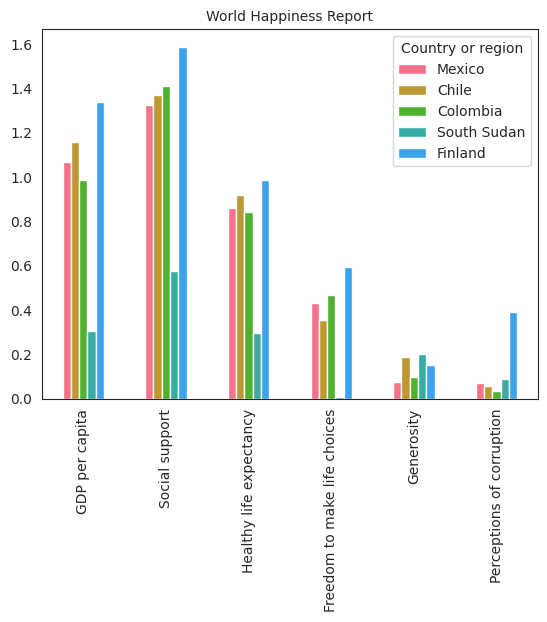

In [53]:
paises.plot(kind = 'bar')
plt.title('World Happiness Report', size = 10)

**8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.**

AttributeError: 'builtin_function_or_method' object has no attribute 'corr'

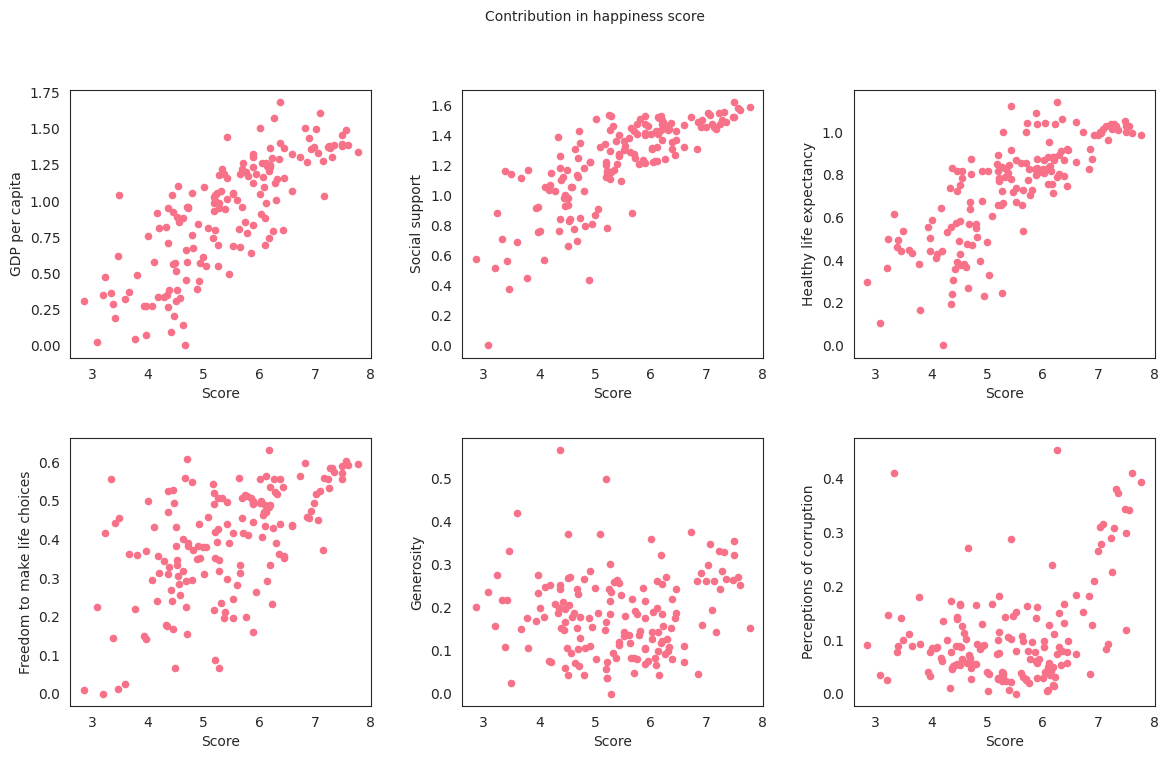

In [78]:
fig, axs = plt.subplots(2,3, figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

fig.suptitle('Contribution in happiness score', size = 10)

happiness.plot.scatter(x = 'Score', y = 'GDP per capita', ax = axs[0, 0])
happiness.plot.scatter(x = 'Score', y = 'Social support', ax = axs[0, 1])
happiness.plot.scatter(x = 'Score', y = 'Healthy life expectancy', ax = axs[0, 2])
happiness.plot.scatter(x = 'Score', y = 'Freedom to make life choices', ax = axs[1, 0])
happiness.plot.scatter(x = 'Score', y = 'Generosity', ax = axs[1, 1])
happiness.plot.scatter(x = 'Score', y = 'Perceptions of corruption', ax = axs[1, 2])





**Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.**

<ipython-input-80-492d6c8d42e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(happiness.corr(), 2), annot =True)


<Axes: >

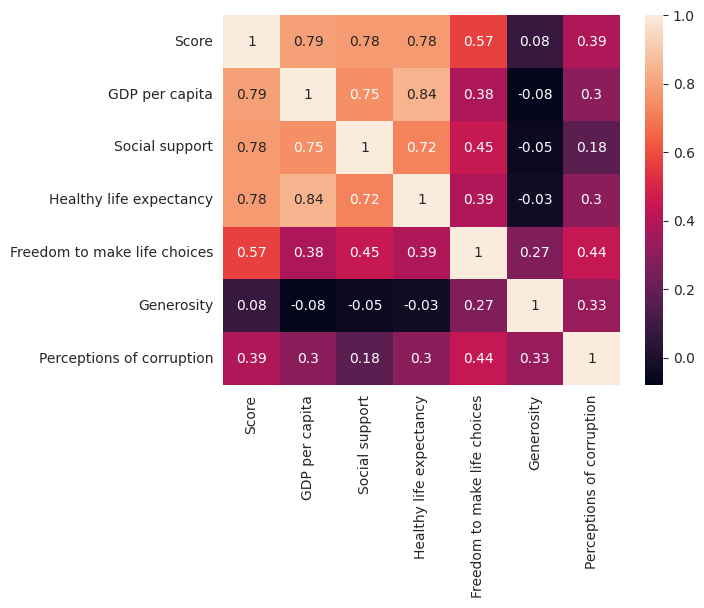

In [80]:
happiness.drop(['Overall rank'], axis = 1, inplace = True)
sns.heatmap(round(happiness.corr(), 2), annot =True)

**9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.**

In [96]:
happiness = pd.read_csv('/content/drive/MyDrive/Happiness_report.csv')
metadata = pd.read_csv('/content/drive/MyDrive/Metadata.csv')

In [97]:
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [98]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [109]:
Paises_score = happiness.loc[happiness.index, ['Country or region','Score']]


In [110]:
Paises_score

,Country or region,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
...,...,...
151,Rwanda,3.334
152,Tanzania,3.231
153,Afghanistan,3.203
154,Central African Republic,3.083


In [111]:
Regiones = metadata.loc[metadata.index, ['TableName','Region']]

In [112]:
Regiones

,TableName,Region
0,Aruba,Latin America & Caribbean
1,Afghanistan,South Asia
2,Angola,Sub-Saharan Africa
3,Albania,Europe & Central Asia
4,Andorra,Europe & Central Asia
...,...,...
258,Kosovo,Europe & Central Asia
259,"Yemen, Rep.",Middle East & North Africa
260,South Africa,Sub-Saharan Africa
261,Zambia,Sub-Saharan Africa


In [113]:
reg_felicidad = Paises_score.merge(Regiones, left_on = 'Country or region', right_on = 'TableName')

In [114]:
reg_felicidad

,Country or region,Score,TableName,Region
0,Finland,7.769,Finland,Europe & Central Asia
1,Denmark,7.600,Denmark,Europe & Central Asia
2,Norway,7.554,Norway,Europe & Central Asia
3,Iceland,7.494,Iceland,Europe & Central Asia
4,Netherlands,7.488,Netherlands,Europe & Central Asia
...,...,...,...,...
131,Rwanda,3.334,Rwanda,Sub-Saharan Africa
132,Tanzania,3.231,Tanzania,Sub-Saharan Africa
133,Afghanistan,3.203,Afghanistan,South Asia
134,Central African Republic,3.083,Central African Republic,Sub-Saharan Africa


In [122]:
reg_felicidad_promedio = reg_felicidad.groupby(['Region']).mean()

<ipython-input-122-9d29a122e1e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_felicidad_promedio = reg_felicidad.groupby(['Region']).mean()


In [123]:
reg_felicidad_promedio

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


<ipython-input-127-6d6139c0e6ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Score', data = reg_felicidad_promedio, palette = 'pastel')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

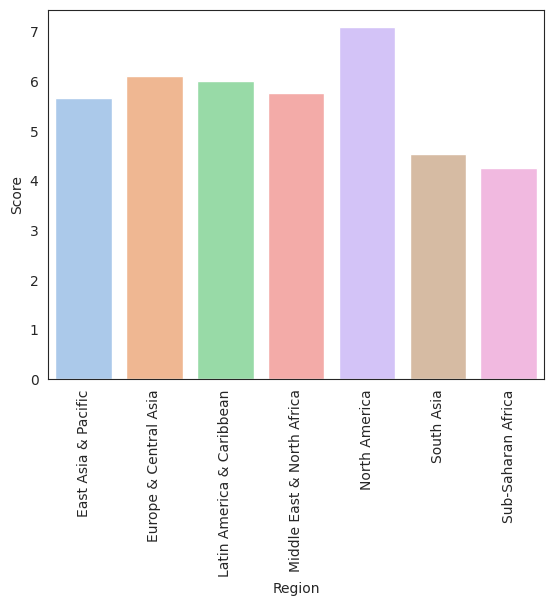

In [127]:
sns.barplot(x = 'Region', y = 'Score', data = reg_felicidad_promedio, palette = 'pastel')
plt.xticks(rotation = 90)